In [ ]:

import numpy as np
import pandas as pd
#import profiling as pp 


In [ ]:
df = pd.read_csv("media prediction and its cost.csv")
df.head()

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,...,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
0,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4.0,Bag Stuffers,USA,M,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62
1,Breakfast Foods,Frozen Foods,Food,5.52,2.5944,3.0,Cash Register Lottery,USA,M,M,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",59.86
2,Breakfast Foods,Frozen Foods,Food,3.68,1.3616,2.0,High Roller Savings,USA,S,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",84.16
3,Breakfast Foods,Frozen Foods,Food,3.68,1.1776,2.0,Cash Register Lottery,USA,M,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,In-Store Coupon,95.78
4,Breakfast Foods,Frozen Foods,Food,4.08,1.4280,3.0,Double Down Sale,USA,M,M,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Radio,50.79


In [ ]:
df.describe()

,store_sales(in millions),store_cost(in millions),unit_sales(in millions),total_children,avg_cars_at home(approx),num_children_at_home,avg_cars_at home(approx).1,SRP,gross_weight,net_weight,...,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
count,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,...,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000
mean,6.541031,2.619460,3.093169,2.533875,2.200271,0.829351,2.200271,2.115258,13.806433,11.796289,...,27988.477494,19133.799696,5312.852552,3541.846280,0.612646,0.354157,0.587956,0.587956,0.562603,99.262366
std,3.463047,1.453009,0.827677,1.490165,1.109644,1.303424,1.109644,0.932829,4.622693,4.682986,...,5701.022090,3987.395735,1575.907263,1050.471635,0.487150,0.478261,0.492207,0.492207,0.496069,30.011257
min,0.510000,0.163200,1.000000,0.000000,0.000000,0.000000,0.000000,0.500000,6.000000,3.050000,...,20319.000000,13305.000000,2452.000000,1635.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.790000
25%,3.810000,1.500000,3.000000,1.000000,1.000000,0.000000,1.000000,1.410000,9.700000,7.710000,...,23593.000000,16232.000000,4746.000000,3164.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.650000
50%,5.940000,2.385600,3.000000,3.000000,2.000000,0.000000,2.000000,2.130000,13.600000,11.600000,...,27694.000000,18670.000000,5062.000000,3375.000000,1.000000,0.000000,1.000000,1.000000,1.000000,98.520000
75%,8.670000,3.484025,4.000000,4.000000,3.000000,1.000000,3.000000,2.790000,17.700000,16.000000,...,30797.000000,22123.000000,5751.000000,3834.000000,1.000000,1.000000,1.000000,1.000000,1.000000,126.620000
max,22.920000,9.726500,6.000000,5.000000,4.000000,5.000000,4.000000,3.980000,21.900000,20.800000,...,39696.000000,30351.000000,9184.000000,6122.000000,1.000000,1.000000,1.000000,1.000000,1.000000,149.750000


In [ ]:
def categorise(row):  
    if row['store_city'] == 'Salem' and row['store_state'] == 'OR':
        return 63927
    elif row['store_city'] == 'Portland' and row['store_state'] == 'OR':
        return 79057
    elif row['store_city'] == 'Los Angeles' and row['store_state'] == 'CA':
        return 70372
    elif row['store_city'] == 'Beverly Hills' and row['store_state'] == 'CA':
        return 84907
    elif row['store_city'] == 'San Francisco' and row['store_state'] == 'CA':
        return 121826
    elif row['store_city'] == 'Tacoma' and row['store_state'] == 'WA':
        return 77141
    elif row['store_city'] == 'Seattle' and row['store_state'] == 'WA':
        return 110781
    elif row['store_city'] == 'Spokane' and row['store_state'] == 'WA':
        return 58714
    elif row['store_city'] == 'Bellingham' and row['store_state'] == 'WA':
        return 58597
    elif row['store_city'] == 'Bremerton' and row['store_state'] == 'WA':
        return 59000

df['AnnualMedianIncome_withoutTax'] = df.apply(lambda row: categorise(row), axis=1)

In [ ]:
df.head()

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,...,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost,AnnualMedianIncome_withoutTax
0,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4.0,Bag Stuffers,USA,M,F,...,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62,63927.0
1,Breakfast Foods,Frozen Foods,Food,5.52,2.5944,3.0,Cash Register Lottery,USA,M,M,...,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",59.86,63927.0
2,Breakfast Foods,Frozen Foods,Food,3.68,1.3616,2.0,High Roller Savings,USA,S,F,...,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",84.16,63927.0
3,Breakfast Foods,Frozen Foods,Food,3.68,1.1776,2.0,Cash Register Lottery,USA,M,F,...,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,In-Store Coupon,95.78,63927.0
4,Breakfast Foods,Frozen Foods,Food,4.08,1.4280,3.0,Double Down Sale,USA,M,M,...,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Radio,50.79,63927.0


In [ ]:
def categorise(row):  
    if row['store_city'] == 'Salem' and row['store_state'] == 'OR':
        return 40680
    elif row['store_city'] == 'Portland' and row['store_state'] == 'OR':
        return 51204
    elif row['store_city'] == 'Los Angeles' and row['store_state'] == 'CA':
        return 63408
    elif row['store_city'] == 'Beverly Hills' and row['store_state'] == 'CA':
        return 78888
    elif row['store_city'] == 'San Francisco' and row['store_state'] == 'CA':
        return 46848
    elif row['store_city'] == 'Tacoma' and row['store_state'] == 'WA':
        return 52932
    elif row['store_city'] == 'Seattle' and row['store_state'] == 'WA':
        return 92268
    elif row['store_city'] == 'Spokane' and row['store_state'] == 'WA':
        return 39288
    elif row['store_city'] == 'Bellingham' and row['store_state'] == 'WA':
        return 48444
    elif row['store_city'] == 'Bremerton' and row['store_state'] == 'WA':
        return 53028
    elif row['store_city'] == 'Orizaba' and row['store_state'] == 'Veracruz':
        return 6972
    elif row['store_city'] == 'Merida' and row['store_state'] == 'Yucatan':
        return 6504
    elif row['store_city'] == 'Hidalgo' and row['store_state'] == 'Zacatecas':
        return 6948
    elif row['store_city'] == 'Camacho' and row['store_state'] == 'Zacatecas':
        return 6948
    elif row['store_city'] == 'Mexico City' and row['store_state'] == 'DF':
        return 8052
    elif row['store_city'] == 'Guadalajara' and row['store_state'] == 'Jalisco':
        return 8688
    elif row['store_city'] == 'Acapulco' and row['store_state'] == 'Guerrero':
        return 4356
    elif row['store_city'] == 'Vancouver' and row['store_state'] == 'BC':
        return 45948
    elif row['store_city'] == 'Victoria' and row['store_state'] == 'BC':
        return 43164

df['AnnualMedianIncome_AfterTax'] = df.apply(lambda row: categorise(row), axis=1)

In [ ]:
df.head()

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,...,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost,AnnualMedianIncome_withoutTax,AnnualMedianIncome_AfterTax
0,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4.0,Bag Stuffers,USA,M,F,...,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62,63927.0,40680
1,Breakfast Foods,Frozen Foods,Food,5.52,2.5944,3.0,Cash Register Lottery,USA,M,M,...,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",59.86,63927.0,40680
2,Breakfast Foods,Frozen Foods,Food,3.68,1.3616,2.0,High Roller Savings,USA,S,F,...,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",84.16,63927.0,40680
3,Breakfast Foods,Frozen Foods,Food,3.68,1.1776,2.0,Cash Register Lottery,USA,M,F,...,3610.0,1.0,1.0,1.0,1.0,1.0,In-Store Coupon,95.78,63927.0,40680
4,Breakfast Foods,Frozen Foods,Food,4.08,1.4280,3.0,Double Down Sale,USA,M,M,...,3610.0,1.0,1.0,1.0,1.0,1.0,Radio,50.79,63927.0,40680


In [ ]:
#df.to_csv('DatasetwithMedIncome.csv')

In [ ]:
### Data Visualization
import matplotlib.pyplot as plt


In [ ]:
import seaborn as sns

In [ ]:
### Data Standardization and Modeling with K-Means and PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [ ]:
sns.set() ## this is for styling

In [ ]:
df.describe()

,store_sales(in millions),store_cost(in millions),unit_sales(in millions),total_children,avg_cars_at home(approx),num_children_at_home,avg_cars_at home(approx).1,SRP,gross_weight,net_weight,...,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost,AnnualMedianIncome_withoutTax,AnnualMedianIncome_AfterTax
count,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,...,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,38892.000000,60428.000000
mean,6.541031,2.619460,3.093169,2.533875,2.200271,0.829351,2.200271,2.115258,13.806433,11.796289,...,5312.852552,3541.846280,0.612646,0.354157,0.587956,0.587956,0.562603,99.262366,76883.150648,42384.814192
std,3.463047,1.453009,0.827677,1.490165,1.109644,1.303424,1.109644,0.932829,4.622693,4.682986,...,1575.907263,1050.471635,0.487150,0.478261,0.492207,0.492207,0.496069,30.011257,17252.820560,26907.637271
min,0.510000,0.163200,1.000000,0.000000,0.000000,0.000000,0.000000,0.500000,6.000000,3.050000,...,2452.000000,1635.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.790000,58597.000000,4356.000000
25%,3.810000,1.500000,3.000000,1.000000,1.000000,0.000000,1.000000,1.410000,9.700000,7.710000,...,4746.000000,3164.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.650000,63927.000000,6972.000000
50%,5.940000,2.385600,3.000000,3.000000,2.000000,0.000000,2.000000,2.130000,13.600000,11.600000,...,5062.000000,3375.000000,1.000000,0.000000,1.000000,1.000000,1.000000,98.520000,77141.000000,45948.000000
75%,8.670000,3.484025,4.000000,4.000000,3.000000,1.000000,3.000000,2.790000,17.700000,16.000000,...,5751.000000,3834.000000,1.000000,1.000000,1.000000,1.000000,1.000000,126.620000,84907.000000,53028.000000
max,22.920000,9.726500,6.000000,5.000000,4.000000,5.000000,4.000000,3.980000,21.900000,20.800000,...,9184.000000,6122.000000,1.000000,1.000000,1.000000,1.000000,1.000000,149.750000,121826.000000,92268.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60428 entries, 0 to 60427
Data columns (total 42 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   food_category                  60428 non-null  object 
 1   food_department                60428 non-null  object 
 2   food_family                    60428 non-null  object 
 3   store_sales(in millions)       60428 non-null  float64
 4   store_cost(in millions)        60428 non-null  float64
 5   unit_sales(in millions)        60428 non-null  float64
 6   promotion_name                 60428 non-null  object 
 7   sales_country                  60428 non-null  object 
 8   marital_status                 60428 non-null  object 
 9   gender                         60428 non-null  object 
 10  total_children                 60428 non-null  float64
 11  education                      60428 non-null  object 
 12  member_card                    60428 non-null 

In [16]:
df = df.drop_duplicates()


In [17]:
df.shape


(60428, 42)

In [18]:
df.columns

Index(['food_category', 'food_department', 'food_family',
       'store_sales(in millions)', 'store_cost(in millions)',
       'unit_sales(in millions)', 'promotion_name', 'sales_country',
       'marital_status', 'gender', 'total_children', 'education',
       'member_card', 'occupation', 'houseowner', 'avg_cars_at home(approx)',
       'avg. yearly_income', 'num_children_at_home',
       'avg_cars_at home(approx).1', 'brand_name', 'SRP', 'gross_weight',
       'net_weight', 'recyclable_package', 'low_fat', 'units_per_case',
       'store_type', 'store_city', 'store_state', 'store_sqft', 'grocery_sqft',
       'frozen_sqft', 'meat_sqft', 'coffee_bar', 'video_store', 'salad_bar',
       'prepared_food', 'florist', 'media_type', 'cost',
       'AnnualMedianIncome_withoutTax', 'AnnualMedianIncome_AfterTax'],
      dtype='object')

In [19]:

df1=df.drop(columns=['food_category', 'food_department','food_family','store_sales(in millions)', 'store_cost(in millions)',
        'unit_sales(in millions)','SRP', 'gross_weight','store_city', 'store_state','meat_sqft','salad_bar','promotion_name',
        'brand_name', 'SRP', 'gross_weight',
       'net_weight', 'recyclable_package', 'low_fat', 'units_per_case',
       'store_city', 'store_state', 'store_sqft', 'grocery_sqft',
       'frozen_sqft', 'meat_sqft', 'coffee_bar', 'video_store', 'salad_bar',
       'prepared_food', 'florist', 'media_type', 'cost',
       'AnnualMedianIncome_withoutTax', 'AnnualMedianIncome_AfterTax'])


In [22]:

df1.shape
df1.info

<bound method DataFrame.info of       sales_country marital_status gender  total_children  \
0               USA              M      F             1.0   
1               USA              M      M             0.0   
2               USA              S      F             4.0   
3               USA              M      F             2.0   
4               USA              M      M             0.0   
...             ...            ...    ...             ...   
60423           USA              M      F             1.0   
60424           USA              S      F             2.0   
60425           USA              M      M             1.0   
60426        Canada              S      M             2.0   
60427        Canada              S      F             3.0   

                 education member_card      occupation houseowner  \
0      Partial High School      Normal  Skilled Manual          Y   
1         Bachelors Degree      Silver    Professional          Y   
2      Partial High School  

In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60428 entries, 0 to 60427
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   sales_country               60428 non-null  object 
 1   marital_status              60428 non-null  object 
 2   gender                      60428 non-null  object 
 3   total_children              60428 non-null  float64
 4   education                   60428 non-null  object 
 5   member_card                 60428 non-null  object 
 6   occupation                  60428 non-null  object 
 7   houseowner                  60428 non-null  object 
 8   avg_cars_at home(approx)    60428 non-null  float64
 9   avg. yearly_income          60428 non-null  object 
 10  num_children_at_home        60428 non-null  float64
 11  avg_cars_at home(approx).1  60428 non-null  float64
 12  store_type                  60428 non-null  object 
dtypes: float64(4), object(9)
memory

In [24]:
#encode the varibales gender
encoding_dict={'M':1,'F':0}
df1['gender']=df1['gender'].map(encoding_dict)


In [25]:
df1.head()

,sales_country,marital_status,gender,total_children,education,member_card,occupation,houseowner,avg_cars_at home(approx),avg. yearly_income,num_children_at_home,avg_cars_at home(approx).1,store_type
0,USA,M,0,1.0,Partial High School,Normal,Skilled Manual,Y,1.0,$10K - $30K,1.0,1.0,Deluxe Supermarket
1,USA,M,1,0.0,Bachelors Degree,Silver,Professional,Y,4.0,$50K - $70K,0.0,4.0,Deluxe Supermarket
2,USA,S,0,4.0,Partial High School,Normal,Manual,N,1.0,$10K - $30K,0.0,1.0,Deluxe Supermarket
3,USA,M,0,2.0,High School Degree,Bronze,Manual,Y,2.0,$30K - $50K,2.0,2.0,Deluxe Supermarket
4,USA,M,1,0.0,Partial High School,Bronze,Skilled Manual,N,2.0,$30K - $50K,0.0,2.0,Deluxe Supermarket


In [26]:
#encode the varibales marital status
encoding_dict1={'M':1,'S':0}
df1['marital_status']=df1['marital_status'].map(encoding_dict1)

In [27]:
df1.head()

,sales_country,marital_status,gender,total_children,education,member_card,occupation,houseowner,avg_cars_at home(approx),avg. yearly_income,num_children_at_home,avg_cars_at home(approx).1,store_type
0,USA,1,0,1.0,Partial High School,Normal,Skilled Manual,Y,1.0,$10K - $30K,1.0,1.0,Deluxe Supermarket
1,USA,1,1,0.0,Bachelors Degree,Silver,Professional,Y,4.0,$50K - $70K,0.0,4.0,Deluxe Supermarket
2,USA,0,0,4.0,Partial High School,Normal,Manual,N,1.0,$10K - $30K,0.0,1.0,Deluxe Supermarket
3,USA,1,0,2.0,High School Degree,Bronze,Manual,Y,2.0,$30K - $50K,2.0,2.0,Deluxe Supermarket
4,USA,1,1,0.0,Partial High School,Bronze,Skilled Manual,N,2.0,$30K - $50K,0.0,2.0,Deluxe Supermarket


In [28]:
#encode the varibales house owner
encoding_dict1={'Y':1,'N':0}
df1['houseowner']=df1['houseowner'].map(encoding_dict1)

In [29]:
df1.head()

,sales_country,marital_status,gender,total_children,education,member_card,occupation,houseowner,avg_cars_at home(approx),avg. yearly_income,num_children_at_home,avg_cars_at home(approx).1,store_type
0,USA,1,0,1.0,Partial High School,Normal,Skilled Manual,1,1.0,$10K - $30K,1.0,1.0,Deluxe Supermarket
1,USA,1,1,0.0,Bachelors Degree,Silver,Professional,1,4.0,$50K - $70K,0.0,4.0,Deluxe Supermarket
2,USA,0,0,4.0,Partial High School,Normal,Manual,0,1.0,$10K - $30K,0.0,1.0,Deluxe Supermarket
3,USA,1,0,2.0,High School Degree,Bronze,Manual,1,2.0,$30K - $50K,2.0,2.0,Deluxe Supermarket
4,USA,1,1,0.0,Partial High School,Bronze,Skilled Manual,0,2.0,$30K - $50K,0.0,2.0,Deluxe Supermarket


In [30]:
#encode the varibales member_card
encoding_dict1={'Normal':1,'Silver':2,'Bronze':3,'Golden':4}
df1['member_card']=df1['member_card'].map(encoding_dict1)

df1.head()

,sales_country,marital_status,gender,total_children,education,member_card,occupation,houseowner,avg_cars_at home(approx),avg. yearly_income,num_children_at_home,avg_cars_at home(approx).1,store_type
0,USA,1,0,1.0,Partial High School,1,Skilled Manual,1,1.0,$10K - $30K,1.0,1.0,Deluxe Supermarket
1,USA,1,1,0.0,Bachelors Degree,2,Professional,1,4.0,$50K - $70K,0.0,4.0,Deluxe Supermarket
2,USA,0,0,4.0,Partial High School,1,Manual,0,1.0,$10K - $30K,0.0,1.0,Deluxe Supermarket
3,USA,1,0,2.0,High School Degree,3,Manual,1,2.0,$30K - $50K,2.0,2.0,Deluxe Supermarket
4,USA,1,1,0.0,Partial High School,3,Skilled Manual,0,2.0,$30K - $50K,0.0,2.0,Deluxe Supermarket


In [31]:
#encode the varibales member_card
encoding_dict1={'Partial High School':1,'Bachelors Degree':2,'High School Degree':3,'Graduate Degree':4,'Partial College':5}
df1['education']=df1['education'].map(encoding_dict1)

df1.head()



,sales_country,marital_status,gender,total_children,education,member_card,occupation,houseowner,avg_cars_at home(approx),avg. yearly_income,num_children_at_home,avg_cars_at home(approx).1,store_type
0,USA,1,0,1.0,1,1,Skilled Manual,1,1.0,$10K - $30K,1.0,1.0,Deluxe Supermarket
1,USA,1,1,0.0,2,2,Professional,1,4.0,$50K - $70K,0.0,4.0,Deluxe Supermarket
2,USA,0,0,4.0,1,1,Manual,0,1.0,$10K - $30K,0.0,1.0,Deluxe Supermarket
3,USA,1,0,2.0,3,3,Manual,1,2.0,$30K - $50K,2.0,2.0,Deluxe Supermarket
4,USA,1,1,0.0,1,3,Skilled Manual,0,2.0,$30K - $50K,0.0,2.0,Deluxe Supermarket


In [32]:
#encode the varibales occupation
encoding_dict1={'Skilled Manual':1,'Professional':2,'Manual':3,'Management':4,'Clerical':5}
df1['occupation']=df1['occupation'].map(encoding_dict1)

df1.head()

,sales_country,marital_status,gender,total_children,education,member_card,occupation,houseowner,avg_cars_at home(approx),avg. yearly_income,num_children_at_home,avg_cars_at home(approx).1,store_type
0,USA,1,0,1.0,1,1,1,1,1.0,$10K - $30K,1.0,1.0,Deluxe Supermarket
1,USA,1,1,0.0,2,2,2,1,4.0,$50K - $70K,0.0,4.0,Deluxe Supermarket
2,USA,0,0,4.0,1,1,3,0,1.0,$10K - $30K,0.0,1.0,Deluxe Supermarket
3,USA,1,0,2.0,3,3,3,1,2.0,$30K - $50K,2.0,2.0,Deluxe Supermarket
4,USA,1,1,0.0,1,3,1,0,2.0,$30K - $50K,0.0,2.0,Deluxe Supermarket


In [33]:
#encode the varibales store_type
encoding_dict1={'Deluxe Supermarket':1,'Supermarket':2,'Gourmet Supermarket':3,'Mid-Size Grocery':4,'Small Grocery':5}
df1['store_type']=df1['store_type'].map(encoding_dict1)

df1.head()

,sales_country,marital_status,gender,total_children,education,member_card,occupation,houseowner,avg_cars_at home(approx),avg. yearly_income,num_children_at_home,avg_cars_at home(approx).1,store_type
0,USA,1,0,1.0,1,1,1,1,1.0,$10K - $30K,1.0,1.0,1
1,USA,1,1,0.0,2,2,2,1,4.0,$50K - $70K,0.0,4.0,1
2,USA,0,0,4.0,1,1,3,0,1.0,$10K - $30K,0.0,1.0,1
3,USA,1,0,2.0,3,3,3,1,2.0,$30K - $50K,2.0,2.0,1
4,USA,1,1,0.0,1,3,1,0,2.0,$30K - $50K,0.0,2.0,1


In [36]:
#convert the floats to int
df1['total_children'] = df1['total_children'].astype(int)
df1.head()

,sales_country,marital_status,gender,total_children,education,member_card,occupation,houseowner,avg_cars_at home(approx),avg. yearly_income,num_children_at_home,avg_cars_at home(approx).1,store_type
0,USA,1,0,1,1,1,1,1,1.0,$10K - $30K,1.0,1.0,1
1,USA,1,1,0,2,2,2,1,4.0,$50K - $70K,0.0,4.0,1
2,USA,0,0,4,1,1,3,0,1.0,$10K - $30K,0.0,1.0,1
3,USA,1,0,2,3,3,3,1,2.0,$30K - $50K,2.0,2.0,1
4,USA,1,1,0,1,3,1,0,2.0,$30K - $50K,0.0,2.0,1


In [38]:
#convert the floats to int
df1['avg_cars_at home(approx)'] = df1['avg_cars_at home(approx)'].astype(int)
df1.head()

,sales_country,marital_status,gender,total_children,education,member_card,occupation,houseowner,avg_cars_at home(approx),avg. yearly_income,num_children_at_home,avg_cars_at home(approx).1,store_type
0,USA,1,0,1,1,1,1,1,1,$10K - $30K,1.0,1.0,1
1,USA,1,1,0,2,2,2,1,4,$50K - $70K,0.0,4.0,1
2,USA,0,0,4,1,1,3,0,1,$10K - $30K,0.0,1.0,1
3,USA,1,0,2,3,3,3,1,2,$30K - $50K,2.0,2.0,1
4,USA,1,1,0,1,3,1,0,2,$30K - $50K,0.0,2.0,1


In [39]:
#convert the floats to int
df1['num_children_at_home'] = df1['num_children_at_home'].astype(int)
df1.head()

,sales_country,marital_status,gender,total_children,education,member_card,occupation,houseowner,avg_cars_at home(approx),avg. yearly_income,num_children_at_home,avg_cars_at home(approx).1,store_type
0,USA,1,0,1,1,1,1,1,1,$10K - $30K,1,1.0,1
1,USA,1,1,0,2,2,2,1,4,$50K - $70K,0,4.0,1
2,USA,0,0,4,1,1,3,0,1,$10K - $30K,0,1.0,1
3,USA,1,0,2,3,3,3,1,2,$30K - $50K,2,2.0,1
4,USA,1,1,0,1,3,1,0,2,$30K - $50K,0,2.0,1


In [40]:
#create 2 variables min and max from average yearly income variable
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60428 entries, 0 to 60427
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   sales_country               60428 non-null  object 
 1   marital_status              60428 non-null  int64  
 2   gender                      60428 non-null  int64  
 3   total_children              60428 non-null  int64  
 4   education                   60428 non-null  int64  
 5   member_card                 60428 non-null  int64  
 6   occupation                  60428 non-null  int64  
 7   houseowner                  60428 non-null  int64  
 8   avg_cars_at home(approx)    60428 non-null  int64  
 9   avg. yearly_income          60428 non-null  object 
 10  num_children_at_home        60428 non-null  int64  
 11  avg_cars_at home(approx).1  60428 non-null  float64
 12  store_type                  60428 non-null  int64  
dtypes: float64(1), int64(10), objec

In [42]:
df1['avg. yearly_income'] = df1['avg. yearly_income'].astype(str)
df1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 60428 entries, 0 to 60427
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   sales_country               60428 non-null  object 
 1   marital_status              60428 non-null  int64  
 2   gender                      60428 non-null  int64  
 3   total_children              60428 non-null  int64  
 4   education                   60428 non-null  int64  
 5   member_card                 60428 non-null  int64  
 6   occupation                  60428 non-null  int64  
 7   houseowner                  60428 non-null  int64  
 8   avg_cars_at home(approx)    60428 non-null  int64  
 9   avg. yearly_income          60428 non-null  object 
 10  num_children_at_home        60428 non-null  int64  
 11  avg_cars_at home(approx).1  60428 non-null  float64
 12  store_type                  60428 non-null  int64  
dtypes: float64(1), int64(10), objec

In [44]:
df1[['Sal_Min','Sal_Max']] = df1['avg. yearly_income'].str.split("-", expand=True)
df1.head()

,sales_country,marital_status,gender,total_children,education,member_card,occupation,houseowner,avg_cars_at home(approx),avg. yearly_income,num_children_at_home,avg_cars_at home(approx).1,store_type,Sal_Min,Sal_Max
0,USA,1,0,1,1,1,1,1,1,$10K - $30K,1,1.0,1,$10K,$30K
1,USA,1,1,0,2,2,2,1,4,$50K - $70K,0,4.0,1,$50K,$70K
2,USA,0,0,4,1,1,3,0,1,$10K - $30K,0,1.0,1,$10K,$30K
3,USA,1,0,2,3,3,3,1,2,$30K - $50K,2,2.0,1,$30K,$50K
4,USA,1,1,0,1,3,1,0,2,$30K - $50K,0,2.0,1,$30K,$50K


In [47]:
df1['Sal_Min'] = df1['Sal_Min'].str.replace('$', '')
#df1['Sal_Min'] = df1['Sal_Min'].str.replace('K', '')
#df1['Sal_Min'] = df1['Sal_Min'].astype(int)
df1.head()

/var/folders/_p/r33_n0bn37d4by1tvlxt4r000000gn/T/ipykernel_4420/2275682166.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df1['Sal_Min'] = df1['Sal_Min'].str.replace('$', '')


,sales_country,marital_status,gender,total_children,education,member_card,occupation,houseowner,avg_cars_at home(approx),avg. yearly_income,num_children_at_home,avg_cars_at home(approx).1,store_type,Sal_Min,Sal_Max
0,USA,1,0,1,1,1,1,1,1,$10K - $30K,1,1.0,1,10,$30K
1,USA,1,1,0,2,2,2,1,4,$50K - $70K,0,4.0,1,50,$70K
2,USA,0,0,4,1,1,3,0,1,$10K - $30K,0,1.0,1,10,$30K
3,USA,1,0,2,3,3,3,1,2,$30K - $50K,2,2.0,1,30,$50K
4,USA,1,1,0,1,3,1,0,2,$30K - $50K,0,2.0,1,30,$50K


In [51]:

df1['Sal_Max'] = df1['Sal_Max'].str.replace('$', '')
#df1['Sal_Max'] = df1['Sal_Max'].str.replace('K', '')
#df1['Sal_Max'] = df1['Sal_Max'].astype(int)
df1.head()

/var/folders/_p/r33_n0bn37d4by1tvlxt4r000000gn/T/ipykernel_4420/4080768260.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df1['Sal_Max'] = df1['Sal_Max'].str.replace('$', '')


,sales_country,marital_status,gender,total_children,education,member_card,occupation,houseowner,avg_cars_at home(approx),avg. yearly_income,num_children_at_home,avg_cars_at home(approx).1,store_type,Sal_Min,Sal_Max
0,USA,1,0,1,1,1,1,1,1,$10K - $30K,1,1.0,1,10,30
1,USA,1,1,0,2,2,2,1,4,$50K - $70K,0,4.0,1,50,70
2,USA,0,0,4,1,1,3,0,1,$10K - $30K,0,1.0,1,10,30
3,USA,1,0,2,3,3,3,1,2,$30K - $50K,2,2.0,1,30,50
4,USA,1,1,0,1,3,1,0,2,$30K - $50K,0,2.0,1,30,50


In [52]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60428 entries, 0 to 60427
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   sales_country               60428 non-null  object 
 1   marital_status              60428 non-null  int64  
 2   gender                      60428 non-null  int64  
 3   total_children              60428 non-null  int64  
 4   education                   60428 non-null  int64  
 5   member_card                 60428 non-null  int64  
 6   occupation                  60428 non-null  int64  
 7   houseowner                  60428 non-null  int64  
 8   avg_cars_at home(approx)    60428 non-null  int64  
 9   avg. yearly_income          60428 non-null  object 
 10  num_children_at_home        60428 non-null  int64  
 11  avg_cars_at home(approx).1  60428 non-null  float64
 12  store_type                  60428 non-null  int64  
 13  Sal_Min                     604

In [55]:
df1['Sal_Max'] = df1['Sal_Max'].astype(str)


In [61]:
df1['Sal_Max'] = df1['Sal_Max'].str.strip()


In [68]:
df1.to_csv('segment.csv')


In [69]:
df1['Sal_Min'] = df1['Sal_Min'].str.replace('+', '')


/var/folders/_p/r33_n0bn37d4by1tvlxt4r000000gn/T/ipykernel_4420/4148020693.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df1['Sal_Min'] = df1['Sal_Min'].str.replace('+', '')


TypeError: repl must be a string or callable

In [72]:

df1['Sal_Min'] = df1['Sal_Min'].str.strip()
df1['Sal_Min'] = df1['Sal_Min'].astype(int)
df1.head()


,sales_country,marital_status,gender,total_children,education,member_card,occupation,houseowner,avg_cars_at home(approx),avg. yearly_income,num_children_at_home,avg_cars_at home(approx).1,store_type,Sal_Min,Sal_Max
0,USA,1,0,1,1,1,1,1,1,$10K - $30K,1,1.0,1,10,30
1,USA,1,1,0,2,2,2,1,4,$50K - $70K,0,4.0,1,50,70
2,USA,0,0,4,1,1,3,0,1,$10K - $30K,0,1.0,1,10,30
3,USA,1,0,2,3,3,3,1,2,$30K - $50K,2,2.0,1,30,50
4,USA,1,1,0,1,3,1,0,2,$30K - $50K,0,2.0,1,30,50


In [75]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60428 entries, 0 to 60427
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   sales_country               60428 non-null  object 
 1   marital_status              60428 non-null  int64  
 2   gender                      60428 non-null  int64  
 3   total_children              60428 non-null  int64  
 4   education                   60428 non-null  int64  
 5   member_card                 60428 non-null  int64  
 6   occupation                  60428 non-null  int64  
 7   houseowner                  60428 non-null  int64  
 8   avg_cars_at home(approx)    60428 non-null  int64  
 9   avg. yearly_income          60428 non-null  object 
 10  num_children_at_home        60428 non-null  int64  
 11  avg_cars_at home(approx).1  60428 non-null  float64
 12  store_type                  60428 non-null  int64  
 13  Sal_Min                     604

In [77]:
#I have a Pandas DataFrame like this:
#I want to replace the col1 values with the values in the second column (col2) only if col1 values are equal to 0,
#df['col1'] = np.where(df['col1'] == 0, df['col2'], df['col1'])
#i want to replace salmax with the salmin value where salmax = none
df1['Sal_Max'] = np.where(df1['Sal_Max'] == 'None', df1['Sal_Min'], df1['Sal_Max'])
df1.head()

,sales_country,marital_status,gender,total_children,education,member_card,occupation,houseowner,avg_cars_at home(approx),avg. yearly_income,num_children_at_home,avg_cars_at home(approx).1,store_type,Sal_Min,Sal_Max
0,USA,1,0,1,1,1,1,1,1,$10K - $30K,1,1.0,1,10,30
1,USA,1,1,0,2,2,2,1,4,$50K - $70K,0,4.0,1,50,70
2,USA,0,0,4,1,1,3,0,1,$10K - $30K,0,1.0,1,10,30
3,USA,1,0,2,3,3,3,1,2,$30K - $50K,2,2.0,1,30,50
4,USA,1,1,0,1,3,1,0,2,$30K - $50K,0,2.0,1,30,50


In [78]:
df1.to_csv('segment1.csv')

In [80]:
#df1['Sal_Max'] = df1['Sal_Max'].str.strip()


In [86]:



df1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 60428 entries, 0 to 60427
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   sales_country               60428 non-null  object 
 1   marital_status              60428 non-null  int64  
 2   gender                      60428 non-null  int64  
 3   total_children              60428 non-null  int64  
 4   education                   60428 non-null  int64  
 5   member_card                 60428 non-null  int64  
 6   occupation                  60428 non-null  int64  
 7   houseowner                  60428 non-null  int64  
 8   avg_cars_at home(approx)    60428 non-null  int64  
 9   avg. yearly_income          60428 non-null  object 
 10  num_children_at_home        60428 non-null  int64  
 11  avg_cars_at home(approx).1  60428 non-null  float64
 12  store_type                  60428 non-null  int64  
 13  Sal_Min                     604

In [96]:
df1 = pd.read_csv("segment1.csv")

In [97]:
df1.describe()

,Unnamed: 0,marital_status,gender,total_children,education,member_card,occupation,houseowner,avg_cars_at home(approx),num_children_at_home,avg_cars_at home(approx).1,store_type,Sal_Min,Sal_Max
count,60428.00000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000
mean,30213.50000,0.497667,0.487953,2.533875,2.359287,2.580062,2.322797,0.604190,2.200271,0.829351,2.200271,1.917919,48.312372,67.921493
std,17444.20537,0.499999,0.499859,1.490165,1.208408,0.976037,1.071242,0.489028,1.109644,1.303424,1.109644,0.978283,36.093954,35.084785
min,0.00000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,10.000000,30.000000
25%,15106.75000,0.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,30.000000,50.000000
50%,30213.50000,0.000000,0.000000,3.000000,2.000000,3.000000,2.000000,1.000000,2.000000,0.000000,2.000000,2.000000,30.000000,50.000000
75%,45320.25000,1.000000,1.000000,4.000000,3.000000,3.000000,3.000000,1.000000,3.000000,1.000000,3.000000,2.000000,70.000000,90.000000
max,60427.00000,1.000000,1.000000,5.000000,5.000000,4.000000,5.000000,1.000000,4.000000,5.000000,4.000000,5.000000,150.000000,150.000000


In [98]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60428 entries, 0 to 60427
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  60428 non-null  int64  
 1   sales_country               60428 non-null  object 
 2   marital_status              60428 non-null  int64  
 3   gender                      60428 non-null  int64  
 4   total_children              60428 non-null  int64  
 5   education                   60428 non-null  int64  
 6   member_card                 60428 non-null  int64  
 7   occupation                  60428 non-null  int64  
 8   houseowner                  60428 non-null  int64  
 9   avg_cars_at home(approx)    60428 non-null  int64  
 10  avg. yearly_income          60428 non-null  object 
 11  num_children_at_home        60428 non-null  int64  
 12  avg_cars_at home(approx).1  60428 non-null  float64
 13  store_type                  604

In [99]:
df1.head()

,Unnamed: 0,sales_country,marital_status,gender,total_children,education,member_card,occupation,houseowner,avg_cars_at home(approx),avg. yearly_income,num_children_at_home,avg_cars_at home(approx).1,store_type,Sal_Min,Sal_Max
0,0,USA,1,0,1,1,1,1,1,1,$10K - $30K,1,1.0,1,10,30
1,1,USA,1,1,0,2,2,2,1,4,$50K - $70K,0,4.0,1,50,70
2,2,USA,0,0,4,1,1,3,0,1,$10K - $30K,0,1.0,1,10,30
3,3,USA,1,0,2,3,3,3,1,2,$30K - $50K,2,2.0,1,30,50
4,4,USA,1,1,0,1,3,1,0,2,$30K - $50K,0,2.0,1,30,50


In [101]:
df1.columns


Index(['Unnamed: 0', 'sales_country', 'marital_status', 'gender',
       'total_children', 'education', 'member_card', 'occupation',
       'houseowner', 'avg_cars_at home(approx)', 'avg. yearly_income',
       'num_children_at_home', 'avg_cars_at home(approx).1', 'store_type',
       'Sal_Min', 'Sal_Max'],
      dtype='object')

In [102]:
df1=df1.drop(columns=['avg_cars_at home(approx).1','avg. yearly_income'])
df1.head()

,Unnamed: 0,sales_country,marital_status,gender,total_children,education,member_card,occupation,houseowner,avg_cars_at home(approx),num_children_at_home,store_type,Sal_Min,Sal_Max
0,0,USA,1,0,1,1,1,1,1,1,1,1,10,30
1,1,USA,1,1,0,2,2,2,1,4,0,1,50,70
2,2,USA,0,0,4,1,1,3,0,1,0,1,10,30
3,3,USA,1,0,2,3,3,3,1,2,2,1,30,50
4,4,USA,1,1,0,1,3,1,0,2,0,1,30,50


In [103]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60428 entries, 0 to 60427
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                60428 non-null  int64 
 1   sales_country             60428 non-null  object
 2   marital_status            60428 non-null  int64 
 3   gender                    60428 non-null  int64 
 4   total_children            60428 non-null  int64 
 5   education                 60428 non-null  int64 
 6   member_card               60428 non-null  int64 
 7   occupation                60428 non-null  int64 
 8   houseowner                60428 non-null  int64 
 9   avg_cars_at home(approx)  60428 non-null  int64 
 10  num_children_at_home      60428 non-null  int64 
 11  store_type                60428 non-null  int64 
 12  Sal_Min                   60428 non-null  int64 
 13  Sal_Max                   60428 non-null  int64 
dtypes: int64(13), object(1

In [105]:
#drop the columns from countries mexico and canada
indexcountry = df1[ (df1['sales_country'] == 'Canada') ].index
df1.drop(indexcountry , inplace=True)
df1.head(15)

,Unnamed: 0,sales_country,marital_status,gender,total_children,education,member_card,occupation,houseowner,avg_cars_at home(approx),num_children_at_home,store_type,Sal_Min,Sal_Max
0,0,USA,1,0,1,1,1,1,1,1,1,1,10,30
1,1,USA,1,1,0,2,2,2,1,4,0,1,50,70
2,2,USA,0,0,4,1,1,3,0,1,0,1,10,30
3,3,USA,1,0,2,3,3,3,1,2,2,1,30,50
4,4,USA,1,1,0,1,3,1,0,2,0,1,30,50
5,5,USA,1,0,2,2,3,2,0,1,2,1,50,70
6,6,USA,0,0,4,3,3,1,0,2,0,1,30,50
7,7,USA,0,1,1,1,3,3,1,4,0,1,50,70
8,8,USA,0,0,2,1,1,1,0,2,0,1,10,30
9,9,USA,0,0,3,4,3,2,0,1,0,1,70,90


In [106]:
indexcountry = df1[ (df1['sales_country'] == 'Mexico') ].index
df1.drop(indexcountry , inplace=True)
df1.head(15)

,Unnamed: 0,sales_country,marital_status,gender,total_children,education,member_card,occupation,houseowner,avg_cars_at home(approx),num_children_at_home,store_type,Sal_Min,Sal_Max
0,0,USA,1,0,1,1,1,1,1,1,1,1,10,30
1,1,USA,1,1,0,2,2,2,1,4,0,1,50,70
2,2,USA,0,0,4,1,1,3,0,1,0,1,10,30
3,3,USA,1,0,2,3,3,3,1,2,2,1,30,50
4,4,USA,1,1,0,1,3,1,0,2,0,1,30,50
5,5,USA,1,0,2,2,3,2,0,1,2,1,50,70
6,6,USA,0,0,4,3,3,1,0,2,0,1,30,50
7,7,USA,0,1,1,1,3,3,1,4,0,1,50,70
8,8,USA,0,0,2,1,1,1,0,2,0,1,10,30
9,9,USA,0,0,3,4,3,2,0,1,0,1,70,90


In [110]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38892 entries, 0 to 60425
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                38892 non-null  int64 
 1   sales_country             38892 non-null  object
 2   marital_status            38892 non-null  int64 
 3   gender                    38892 non-null  int64 
 4   total_children            38892 non-null  int64 
 5   education                 38892 non-null  int64 
 6   member_card               38892 non-null  int64 
 7   occupation                38892 non-null  int64 
 8   houseowner                38892 non-null  int64 
 9   avg_cars_at home(approx)  38892 non-null  int64 
 10  num_children_at_home      38892 non-null  int64 
 11  store_type                38892 non-null  int64 
 12  Sal_Min                   38892 non-null  int64 
 13  Sal_Max                   38892 non-null  int64 
dtypes: int64(13), object(1

In [111]:
df1.columns

Index(['Unnamed: 0', 'sales_country', 'marital_status', 'gender',
       'total_children', 'education', 'member_card', 'occupation',
       'houseowner', 'avg_cars_at home(approx)', 'num_children_at_home',
       'store_type', 'Sal_Min', 'Sal_Max'],
      dtype='object')

In [113]:
df1.to_csv('segmentUSA.csv')

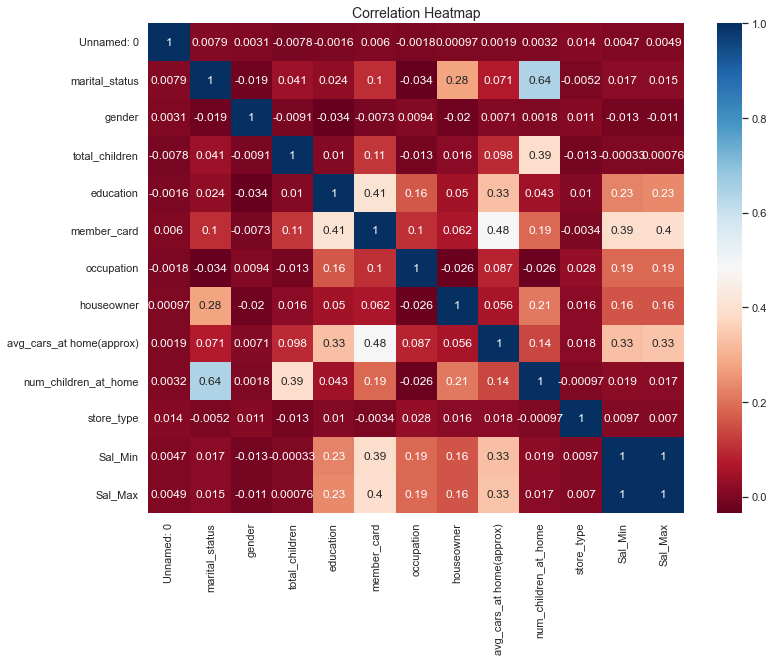

In [114]:
plt.figure(figsize=(12,9))
sns.heatmap(df1.corr(),annot=True,cmap='RdBu')
plt.title('Correlation Heatmap',fontsize=14)
plt.yticks(rotation =0)
plt.show()

In [116]:
df1.columns

Index(['Unnamed: 0', 'sales_country', 'marital_status', 'gender',
       'total_children', 'education', 'member_card', 'occupation',
       'houseowner', 'avg_cars_at home(approx)', 'num_children_at_home',
       'store_type', 'Sal_Min', 'Sal_Max'],
      dtype='object')

In [117]:
df1=df1.drop(columns=['sales_country','Unnamed: 0'])
df1.head()

,marital_status,gender,total_children,education,member_card,occupation,houseowner,avg_cars_at home(approx),num_children_at_home,store_type,Sal_Min,Sal_Max
0,1,0,1,1,1,1,1,1,1,1,10,30
1,1,1,0,2,2,2,1,4,0,1,50,70
2,0,0,4,1,1,3,0,1,0,1,10,30
3,1,0,2,3,3,3,1,2,2,1,30,50
4,1,1,0,1,3,1,0,2,0,1,30,50


In [118]:
scaler = StandardScaler()
df1_std = scaler.fit_transform(df1)

In [119]:
df1.head()

,marital_status,gender,total_children,education,member_card,occupation,houseowner,avg_cars_at home(approx),num_children_at_home,store_type,Sal_Min,Sal_Max
0,1,0,1,1,1,1,1,1,1,1,10,30
1,1,1,0,2,2,2,1,4,0,1,50,70
2,0,0,4,1,1,3,0,1,0,1,10,30
3,1,0,2,3,3,3,1,2,2,1,30,50
4,1,1,0,1,3,1,0,2,0,1,30,50


In [120]:
df1_std = pd.DataFrame(data = df1_std,columns = df1.columns)

In [122]:
df1_std.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38892 entries, 0 to 38891
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   marital_status            38892 non-null  float64
 1   gender                    38892 non-null  float64
 2   total_children            38892 non-null  float64
 3   education                 38892 non-null  float64
 4   member_card               38892 non-null  float64
 5   occupation                38892 non-null  float64
 6   houseowner                38892 non-null  float64
 7   avg_cars_at home(approx)  38892 non-null  float64
 8   num_children_at_home      38892 non-null  float64
 9   store_type                38892 non-null  float64
 10  Sal_Min                   38892 non-null  float64
 11  Sal_Max                   38892 non-null  float64
dtypes: float64(12)
memory usage: 3.6 MB


In [124]:
#-	Before applying the K-Means algorithm we need to choose how many clusters we would like to have.
wcss = []
for i in range(1,11):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(df1_std)
    wcss.append(kmeans_pca.inertia_)

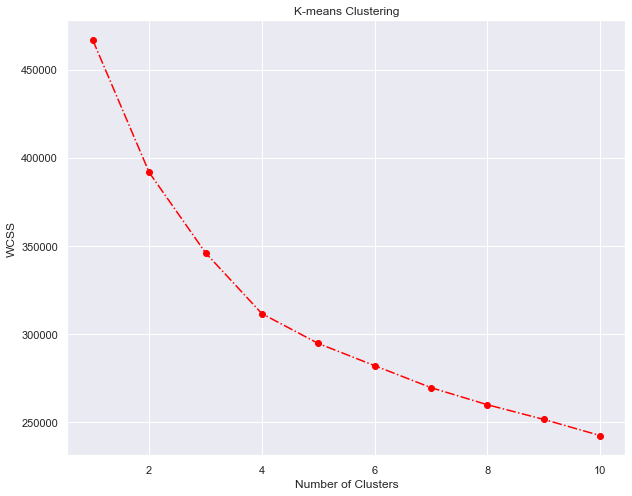

In [125]:
plt.figure(figsize = (10,8))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '-.',color='red')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering')
plt.show()

In [126]:
#Let’s perform K-Means clustering with 4 clusters.
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
kmeans.fit(df1_std)


KMeans(n_clusters=4, random_state=42)

In [128]:
# We create a new data frame with the original features and add a new column with the assigned clusters for each point.
df_segm_kmeans= df1_std.copy()


In [129]:
df_segm_kmeans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38892 entries, 0 to 38891
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   marital_status            38892 non-null  float64
 1   gender                    38892 non-null  float64
 2   total_children            38892 non-null  float64
 3   education                 38892 non-null  float64
 4   member_card               38892 non-null  float64
 5   occupation                38892 non-null  float64
 6   houseowner                38892 non-null  float64
 7   avg_cars_at home(approx)  38892 non-null  float64
 8   num_children_at_home      38892 non-null  float64
 9   store_type                38892 non-null  float64
 10  Sal_Min                   38892 non-null  float64
 11  Sal_Max                   38892 non-null  float64
dtypes: float64(12)
memory usage: 3.6 MB


In [131]:
df1_std['Segment K-means'] = kmeans.labels_



In [132]:
df_segm_analysis = df1_std.groupby(['Segment K-means']).mean()
df_segm_analysis

,marital_status,gender,total_children,education,member_card,occupation,houseowner,avg_cars_at home(approx),num_children_at_home,store_type,Sal_Min,Sal_Max
Segment K-means,,,,,,,,,,,,
0,-0.870731,0.040138,-0.049298,0.281730,0.343688,0.068800,-0.478890,0.212151,-0.632825,0.005376,-0.132329,-0.124432
1,-0.029757,-0.001431,-0.127900,-1.005590,-1.511837,-0.324227,-0.082185,-1.120224,-0.094976,-0.019012,-1.014765,-1.033664
2,-0.017234,-0.014675,-0.104906,0.223685,0.305080,0.292804,0.481687,0.297077,-0.057870,0.027457,1.930870,1.923274
3,1.018006,-0.036869,0.204411,0.306721,0.567814,0.009884,0.354722,0.432241,0.817382,-0.006256,-0.098936,-0.090026
